<a href="https://colab.research.google.com/github/SAURABH11072004/ML/blob/main/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
df = pd.read_csv("/adult_cleaned (1).csv")
df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.isna().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,1843
relationship,0
race,0
sex,0


In [9]:
df.shape

(32561, 15)

In [10]:
new_df = df.dropna()
new_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
new_df.shape

(30162, 15)

In [16]:
from sklearn.impute import SimpleImputer
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include='object').columns
df_imputed = df.copy()
num_imputer = SimpleImputer(strategy='mean')
df_imputed[num_cols] = num_imputer.fit_transform(df[num_cols])

# Impute categorical columns with most frequent value (mode)
cat_imputer = SimpleImputer(strategy='most_frequent')
df_imputed[cat_cols] = cat_imputer.fit_transform(df[cat_cols])
df_imputed.isna().sum()


,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [17]:
numeric_cols = df_imputed.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df_imputed[col].quantile(0.25)
    Q3 = df_imputed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_imputed[(df_imputed[col] < lower_bound) | (df_imputed[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

age: 143 outliers
fnlwgt: 992 outliers
education_num: 1198 outliers
capital_gain: 2712 outliers
capital_loss: 1519 outliers
hours_per_week: 9008 outliers


In [23]:
df_iqr_removed = df_imputed.copy()
df_iqr_removed = df_iqr_removed[(df_iqr_removed[col] >= lower_bound) & (df_iqr_removed[col] <= upper_bound)]
print("✅ Shape after IQR outlier removal:", df_iqr_removed.shape)

✅ Shape after IQR outlier removal: (23553, 15)


In [21]:
from scipy.stats import zscore
import numpy as np

z_scores = np.abs(zscore(df_imputed[numeric_cols]))
threshold = 3

outlier_rows = (z_scores > threshold).any(axis=1)
print("Number of outliers (Z-score method):", outlier_rows.sum())


Number of outliers (Z-score method): 2733


In [28]:
df_z_removed = df_imputed[~outlier_rows]
print("Shape after Z-score outlier removal:", df_z_removed.shape)

Shape after Z-score outlier removal: (29828, 15)


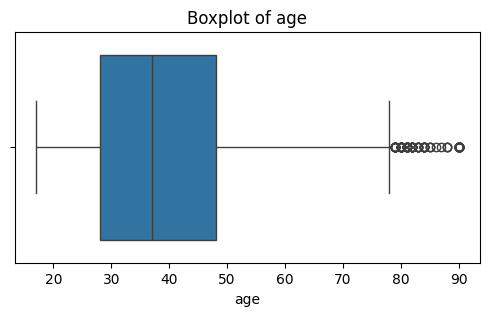

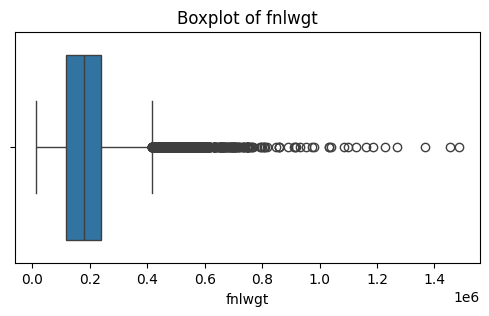

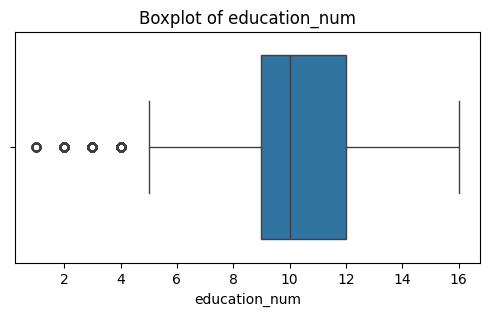

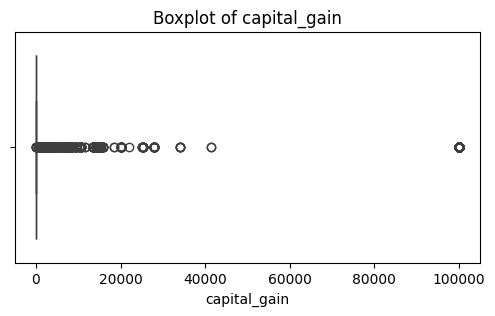

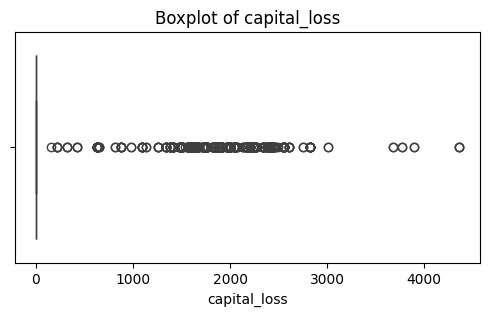

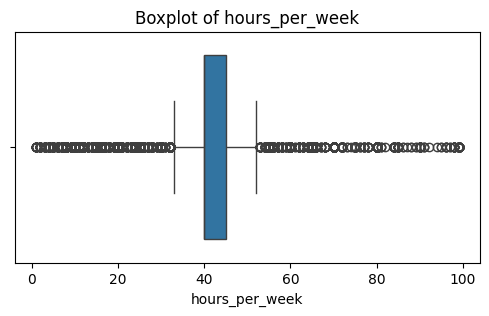

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_imputed[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [29]:
df_z_removed.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [30]:
cat_cols = df_z_removed.select_dtypes(include='object').columns
print("Categorical columns:\n", cat_cols)


Categorical columns:
 Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')


In [38]:
from sklearn.preprocessing import LabelEncoder

df_label_encoded = df_z_removed.copy()
le = LabelEncoder()

for col in cat_cols:
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col])

df_label_encoded.head()



,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39.0,6,77516.0,8,13.0,4,0,1,4,1,2174.0,0.0,40.0,37,0
1,50.0,5,83311.0,8,13.0,2,3,0,4,1,0.0,0.0,13.0,37,0
2,38.0,3,215646.0,10,9.0,0,5,1,4,1,0.0,0.0,40.0,37,0
3,53.0,3,234721.0,1,7.0,2,5,0,2,1,0.0,0.0,40.0,37,0
4,28.0,3,338409.0,8,13.0,2,9,5,2,0,0.0,0.0,40.0,4,0


In [36]:
df_one_hot = pd.get_dummies(df_z_removed, columns=cat_cols, drop_first=True)
df_one_hot = df_one_hot.astype(int)
df_one_hot.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_>50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df_one_hot = pd.get_dummies(df_z_removed, columns=cat_cols, drop_first=True)
df_one_hot = df_one_hot.astype(int)
print("\n One-hot encoded dataset shape:", df_one_hot.shape)
print("\n Preview of encoded data:")
df_one_hot.head()


 One-hot encoded dataset shape: (29828, 95)

 Preview of encoded data:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_>50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


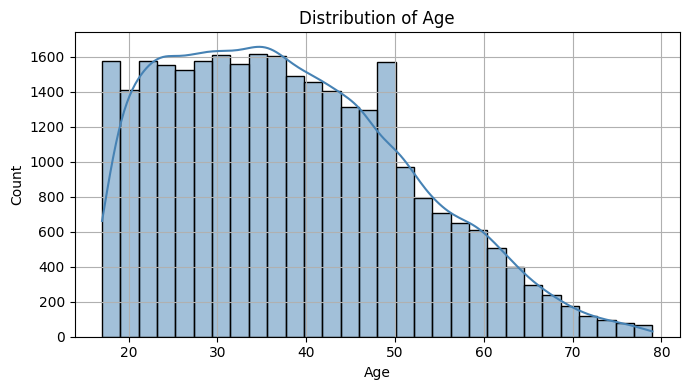

In [42]:
plt.figure(figsize=(7, 4))
sns.histplot(df_z_removed['age'], bins=30, kde=True, color='steelblue')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1975862126.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=df_z_removed, palette='pastel')


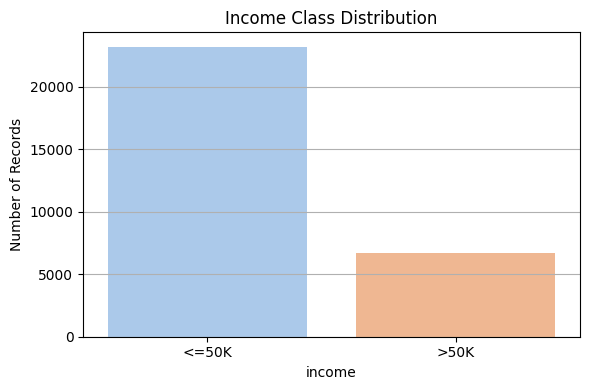

In [43]:
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=df_z_removed, palette='pastel')
plt.title("Income Class Distribution")
plt.ylabel("Number of Records")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


/tmp/ipython-input-564203550.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='education', data=df_z_removed, order=df_z_removed['education'].value_counts().index, palette='viridis')


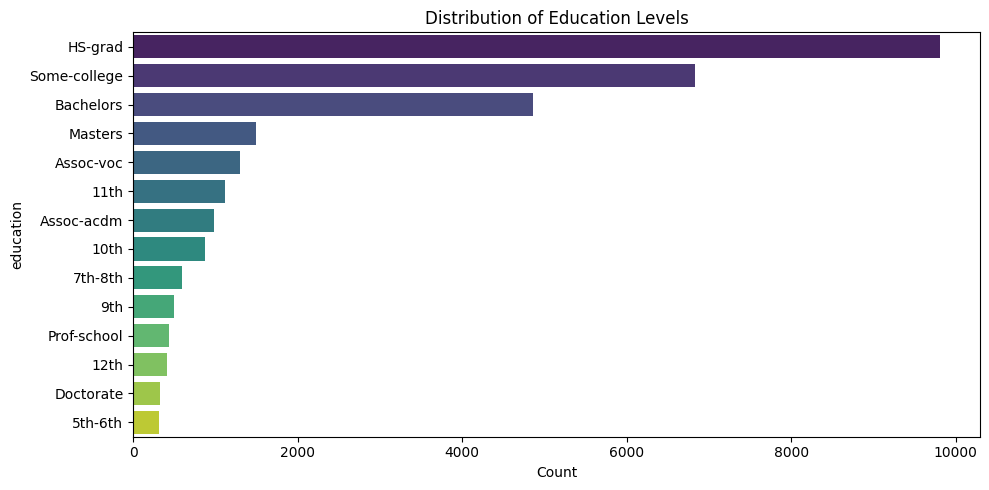

In [44]:
plt.figure(figsize=(10, 5))
sns.countplot(y='education', data=df_z_removed, order=df_z_removed['education'].value_counts().index, palette='viridis')
plt.title("Distribution of Education Levels")
plt.xlabel("Count")
plt.tight_layout()
plt.show()


/tmp/ipython-input-2493570583.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='income', y='age', data=df_z_removed, palette='cool')


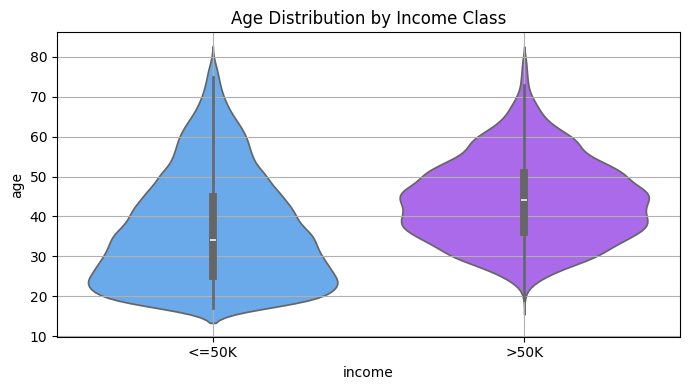

In [47]:
plt.figure(figsize=(7, 4))
sns.violinplot(x='income', y='age', data=df_z_removed, palette='cool')
plt.title("Age Distribution by Income Class")
plt.grid(True)
plt.tight_layout()
plt.show()


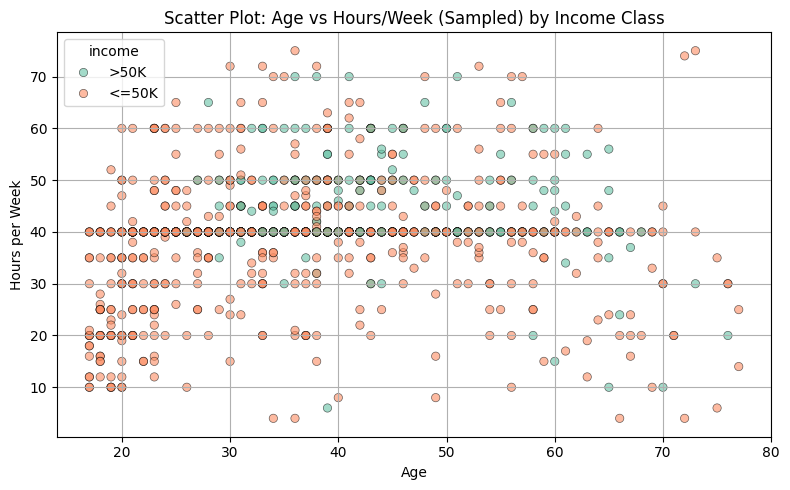

In [49]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_z_removed.sample(1000, random_state=42),  # 👈 plot a sample (not all rows)
    x='age',
    y='hours_per_week',
    hue='income',
    palette='Set2',
    alpha=0.6,
    edgecolor='black'
)
plt.title("Scatter Plot: Age vs Hours/Week (Sampled) by Income Class")
plt.xlabel("Age")
plt.ylabel("Hours per Week")
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
# Compute correlation matrix
corr_matrix = df_label_encoded.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Sort correlations with income column
target_corr = corr_matrix['income'].sort_values(ascending=False)

print("🔍 Top correlations with income:\n")
print(target_corr.head(10))
print("\n🔻 Lowest correlations with income:\n")
print(target_corr.tail(5))


🔍 Top correlations with income:

income            1.000000
capital_gain      0.342534
education_num     0.318569
age               0.239370
hours_per_week    0.230619
sex               0.209922
education         0.074592
race              0.071735
occupation        0.030711
native_country    0.016824
Name: income, dtype: float64

🔻 Lowest correlations with income:

workclass        -0.007243
fnlwgt           -0.009055
capital_loss     -0.016596
marital_status   -0.194471
relationship     -0.245887
Name: income, dtype: float64


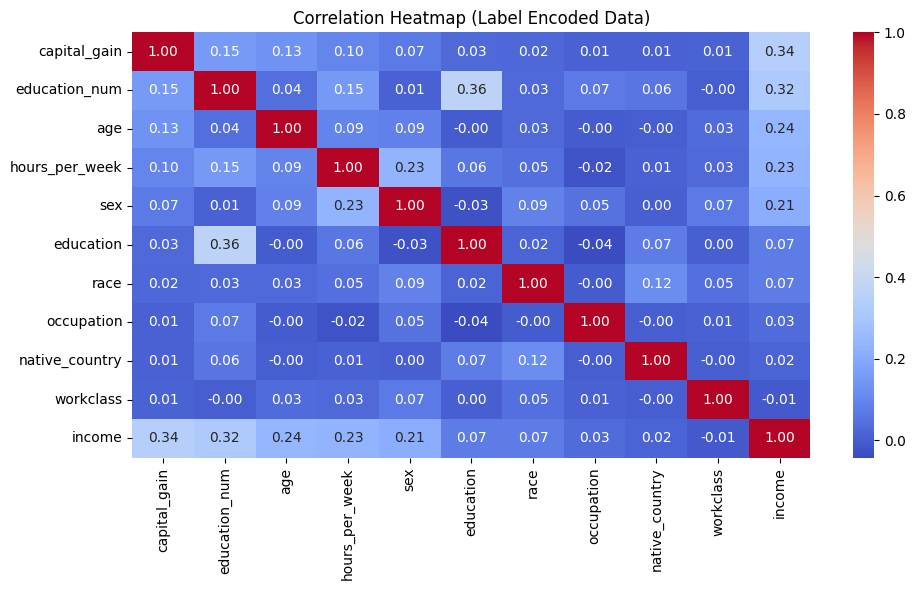

In [53]:
top_corr_features = target_corr[1:11].index.tolist()

plt.figure(figsize=(10, 6))
sns.heatmap(df_label_encoded[top_corr_features + ['income']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Label Encoded Data)")
plt.tight_layout()
plt.show()


In [56]:
from sklearn.feature_selection import VarianceThreshold

# Keep features with variance above 0.01
selector = VarianceThreshold(threshold=0.01)
df_var_selected = selector.fit_transform(df_label_encoded)

# Get selected column names
selected_columns = df_label_encoded.columns[selector.get_support()]
print("✅ Columns retained after Variance Threshold:\n", selected_columns.tolist())


✅ Columns retained after Variance Threshold:
 ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']


In [61]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df_label_encoded.drop(columns='income')  # Features
y = df_label_encoded['income']               # Target

# Select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Show selected features
selected_columns = X.columns[selector.get_support()]
print("✅ Top 10 features selected by SelectKBest:\n", selected_columns.tolist())


✅ Top 10 features selected by SelectKBest:
 ['age', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'hours_per_week']


In [58]:
from sklearn.feature_selection import SelectPercentile

selector = SelectPercentile(score_func=f_classif, percentile=20)
X_percentile = selector.fit_transform(X, y)

selected_columns = X.columns[selector.get_support()]
print("✅ Top 20% features selected by SelectPercentile:\n", selected_columns.tolist())


✅ Top 20% features selected by SelectPercentile:
 ['education_num', 'relationship', 'capital_gain']


In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize data before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 5 principal components
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance by PCA components:")
print(pca.explained_variance_ratio_)


✅ Explained Variance by PCA components:
[0.14912699 0.10073644 0.08210358 0.07951988 0.0736745 ]


# New section